In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('Online_Retail.csv')

In [4]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [7]:
df.isnull().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        406829 non-null  int64  
 1   InvoiceNo    406829 non-null  object 
 2   StockCode    406829 non-null  object 
 3   Description  406829 non-null  object 
 4   Quantity     406829 non-null  int64  
 5   InvoiceDate  406829 non-null  object 
 6   UnitPrice    406829 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      406829 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 31.0+ MB


In [11]:
df.shape

(406829, 9)

In [12]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
df['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [14]:
df['CustomerID']=df['CustomerID'].astype(str)

In [15]:
df['Amount']=df['Quantity'] * df['UnitPrice']

In [16]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [17]:
rfm_df_m=df.groupby('CustomerID')['Amount'].sum()

In [18]:
rfm_df_m

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [19]:
rfm_df_f=df.groupby('CustomerID')['InvoiceNo'].count()
rfm_df_f=rfm_df_f.reset_index()
rfm_df_f.columns=['CustomerID','Frequency']
rfm_df_f

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [29]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
max_date=max(df['InvoiceDate'])
df['Diff']=max_date-df['InvoiceDate']
rfm_df_p=df.groupby('CustomerID')['Diff'].min()
rfm_df_p=rfm_df_p.reset_index()
rfm_df_p.columns=['CustomerID','Diff']
rfm_df_p['Diff']=rfm_df_p['Diff'].dt.days
rfm_df_p

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [28]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [30]:
rfm_df_final=pd.merge(rfm_df_m,rfm_df_f,on='CustomerID',how='inner')
rfm_df_final=pd.merge(rfm_df_final,rfm_df_p,on='CustomerID',how='inner')
rfm_df_final.columns=['CustomerID','Amount','Frequency','Recency']
rfm_df_final.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [31]:
rfm_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   object 
 1   Amount      4372 non-null   float64
 2   Frequency   4372 non-null   int64  
 3   Recency     4372 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 136.8+ KB


In [32]:
Q1=rfm_df_final.Amount.quantile(0.05)
Q3=rfm_df_final.Amount.quantile(0.95)
IQR=Q3-Q1
rfm_df_final=rfm_df_final[(rfm_df_final.Amount>= Q1-1.5 * IQR) & (rfm_df_final.Amount<=Q3+1.5 * IQR)]
Q1=rfm_df_final.Recency.quantile(0.05)
Q3=rfm_df_final.Recency.quantile(0.95)
IQR=Q3-Q1
rfm_df_final=rfm_df_final[(rfm_df_final.Recency>= Q1-1.5 * IQR) & (rfm_df_final.Recency<=Q3+1.5 * IQR)]
Q1=rfm_df_final.Frequency.quantile(0.05)
Q3=rfm_df_final.Frequency.quantile(0.95)
IQR=Q3-Q1
rfm_df_final=rfm_df_final[(rfm_df_final.Frequency>= Q1-1.5 * IQR) & (rfm_df_final.Frequency<=Q3+1.5 * IQR)]


In [34]:
rfm_df_final.shape

(4293, 4)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
X=rfm_df_final[['Amount','Frequency','Recency']]
scaler=MinMaxScaler()
rfm_df_final=scaler.fit_transform(X)

In [40]:
rfm_df_final=pd.DataFrame(rfm_df_final)
rfm_df_final.columns=['Amount','Frequency','Recency']
rfm_df_final.head()

,Amount,Frequency,Recency
0,0.238663,0.001395,0.871314
1,0.478571,0.252441,0.002681
2,0.338703,0.041841,0.198391
3,0.336494,0.100418,0.048257
4,0.257277,0.022315,0.828418


In [41]:
from sklearn.cluster import KMeans

In [42]:
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_final)
lbs=kmeans.labels_
print(lbs)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 2 0 ... 1 0 0]


In [44]:
wcss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, max_iter=50)
    kmeans.fit(rfm_df_final)
    wcss.append(kmeans.inertia_)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

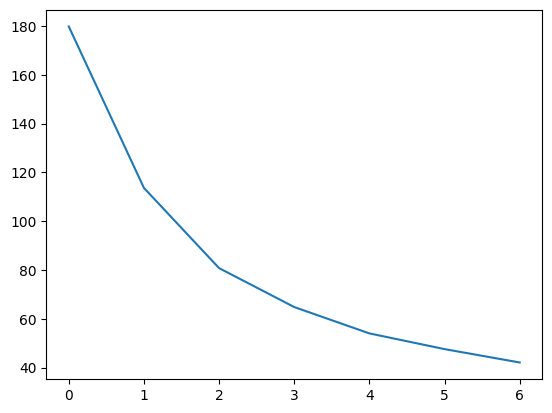

In [46]:
import matplotlib.pyplot as plt
plt.plot(wcss)

In [51]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=n_clusters, max_iter=50)
    kmeans.fit(rfm_df_final)
    cluster_labels=kmeans.labels_
    silhouetee_avg=silhouette_score(rfm_df_final,cluster_labels)
    print('For n_cluster={0},the silhouette score is {1}'.format(n_clusters,silhouetee_avg))


C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_cluster=2,the silhouette score is 0.5889064222823147


C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_cluster=3,the silhouette score is 0.5475024405361522


C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_cluster=4,the silhouette score is 0.5038222293825055


C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_cluster=5,the silhouette score is 0.4482408170286267


C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_cluster=6,the silhouette score is 0.4040369658704452


C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_cluster=7,the silhouette score is 0.3803636173863934


C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_cluster=8,the silhouette score is 0.3794616844921837


In [52]:
rfm_df_final['Cluster_ID']=lbs
rfm_df_final.head()

,Amount,Frequency,Recency,Cluster_ID
0,0.238663,0.001395,0.871314,1
1,0.478571,0.252441,0.002681,2
2,0.338703,0.041841,0.198391,0
3,0.336494,0.100418,0.048257,0
4,0.257277,0.022315,0.828418,1


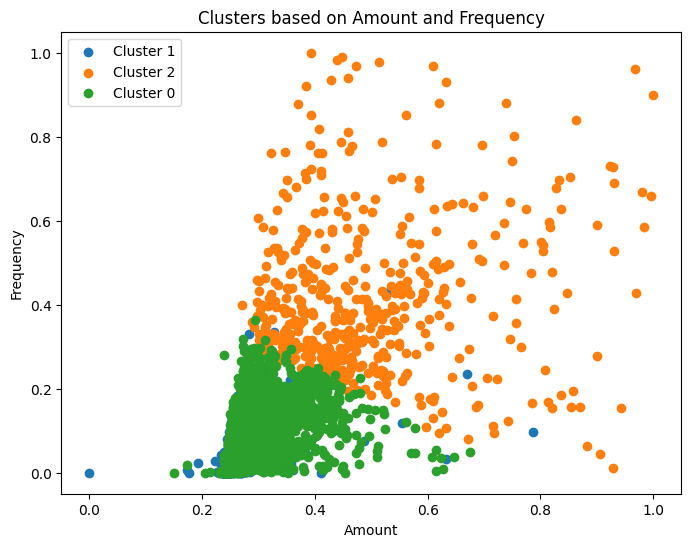

In [53]:
import matplotlib.pyplot as plt

# Scatter plot for Amount vs Frequency with clusters
plt.figure(figsize=(8, 6))
for cluster_id in rfm_df_final['Cluster_ID'].unique():
    cluster_data = rfm_df_final[rfm_df_final['Cluster_ID'] == cluster_id]
    plt.scatter(cluster_data['Amount'], cluster_data['Frequency'], label=f'Cluster {cluster_id}')

plt.title('Clusters based on Amount and Frequency')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()
